In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

## #1

In [3]:
gdp_le = pd.read_csv("../data/gdp_le.csv")

In [4]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


In [5]:
life_exp_year = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

In [6]:
life_exp_year.params

Intercept   -468.138140
Year           0.267722
dtype: float64

### The year coefficient means that to get from the year to life expectancy, you would multiply the value first by that coefficient. The intercept means that whatever value you get after that, you should add it to it. 

### Specifically for these numbers, it shows with the intercept that the life_exp values are much lower than the year values, and that as the year increases the life exp. increases, but not by too much. 

## #1b)

In [7]:
gdp_le["Year_From_1990"] = gdp_le["Year"] - 1990

In [8]:
life_exp_year_diff = smf.ols("Life_Expectancy ~ Year_From_1990", data=gdp_le).fit()

In [10]:
life_exp_year_diff.params

Intercept         64.628889
Year_From_1990     0.267722
dtype: float64

### The Year coefficient is the same, (which makes sense due to the fact that we just scaled the year number), and the intercept is showing that when you make the change in years of life exp. to the year diff, you would add 64.

## #1c)

In [13]:
pred_df = pd.DataFrame(
    {
        'Year_From_1990': np.linspace(start=gdp_le['Year_From_1990'].min(), stop=gdp_le['Year_From_1990'].max())
    }
)

pred_df['mean_estimate'] = life_exp_year_diff.predict(pred_df)


In [14]:
pred_df

,Year_From_1990,mean_estimate
0,0.000000,64.628889
1,0.653061,64.803728
2,1.306122,64.978567
3,1.959184,65.153406
4,2.612245,65.328245
5,3.265306,65.503084
6,3.918367,65.677923
7,4.571429,65.852762
8,5.224490,66.027601
9,5.877551,66.202440


In [19]:
gdp_le_year_le_mean = gdp_le.groupby("Year_From_1990")["Life_Expectancy"].mean().reset_index()
gdp_le_year_le_mean

,Year_From_1990,Life_Expectancy
0,0,64.745253
1,1,65.021276
2,2,65.217845
3,3,65.218031
4,4,65.339539
5,5,65.956224
6,6,66.200189
7,7,66.437280
8,8,66.556082
9,9,66.916176


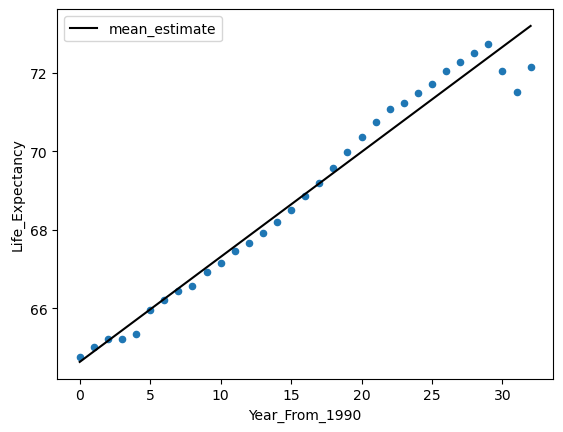

In [20]:
fig, ax = plt.subplots()
gdp_le_year_le_mean.plot(kind="scatter", x="Year_From_1990", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="Year_From_1990", y="mean_estimate", color="black", ax=ax);

### It actually seems to do pretty well all things considered, the ending is kind of off but other than that it is pretty close. 

## #1d)

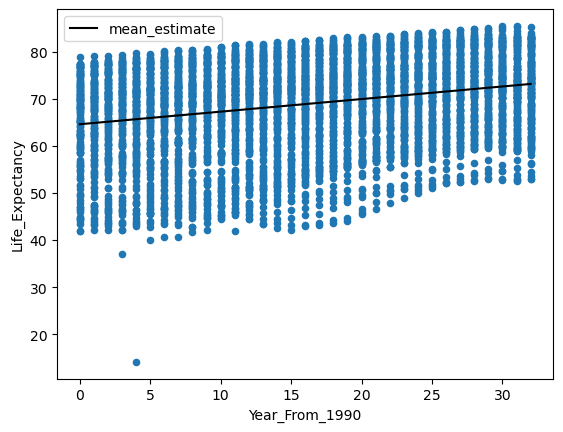

In [21]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="Year_From_1990", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="Year_From_1990", y="mean_estimate", color="black", ax=ax);

## #1e)

In [24]:
life_exp_year_diff.rsquared

0.07154748843194647

### It means that our prediction is in all reality not very accurate in trying to predict what life expectancy would be based on the year. By looking at the most recent graph, we can see it is obvious in that there is a very large and similar range for almost all year values.

# #2

In [26]:
gdp_le_2021 = gdp_le[gdp_le["Year"] == 2021]

In [27]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Year_From_1990
0,Afghanistan,2021,1517.016266,Asia,61.982,31
21,Albania,2021,14595.944386,Europe,76.463,31
54,Algeria,2021,11029.138782,Africa,76.377,31
87,Angola,2021,5911.835657,Africa,61.643,31
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,31
...,...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862,31
5377,Vanuatu,2021,2800.493866,Oceania,70.449,31
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473,31
5439,Zambia,2021,3236.788981,Africa,61.223,31


In [28]:
life_exp_GDP = smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()

### #2a)